In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('/content/Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
#@title performing EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data.shape

(400, 11)

In [ ]:
#convert categorical col in numeric column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data['Urban']=le.fit_transform(data['Urban'])
data['US']=le.fit_transform(data['US'])


In [ ]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [ ]:
#check null values
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#check duplicate values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


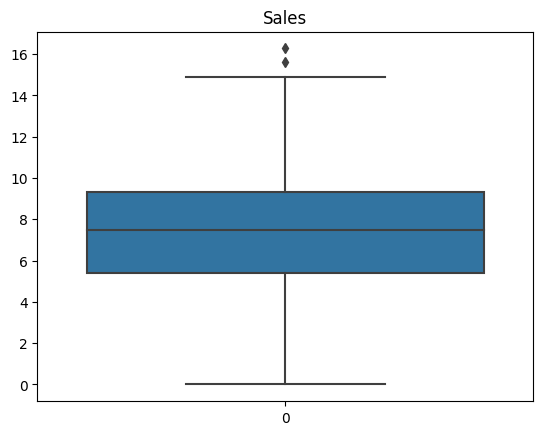

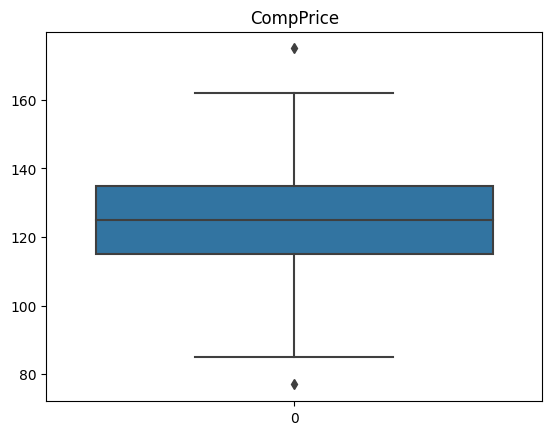

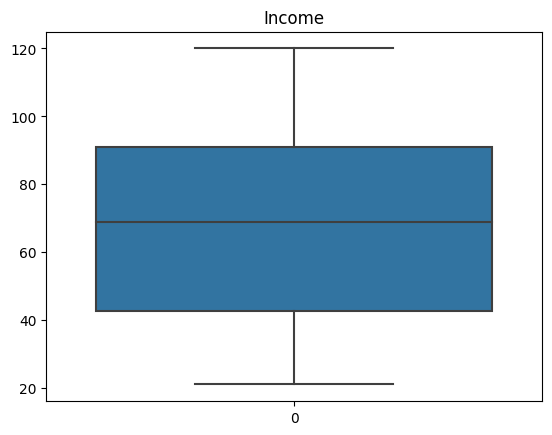

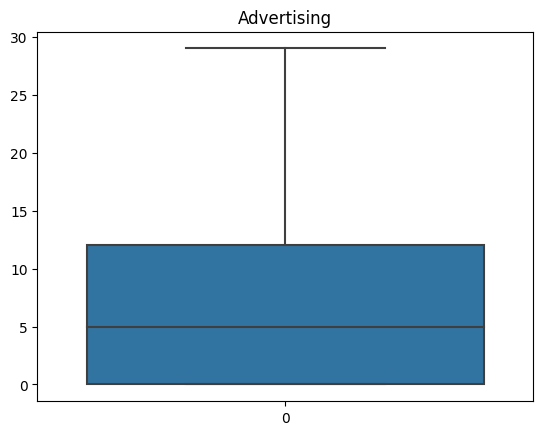

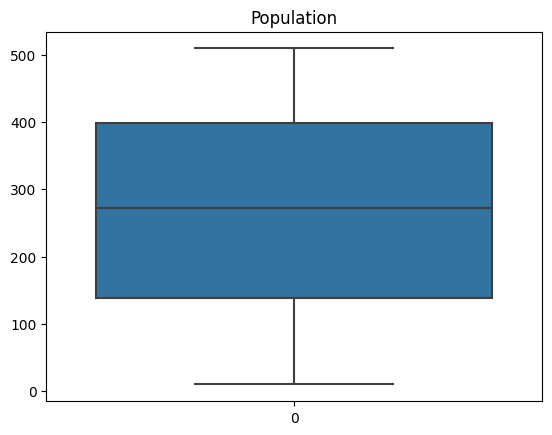

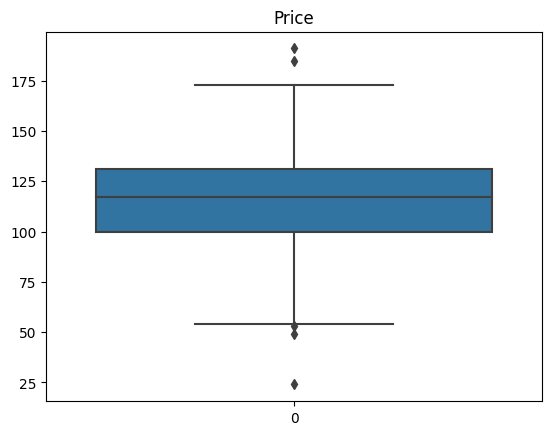

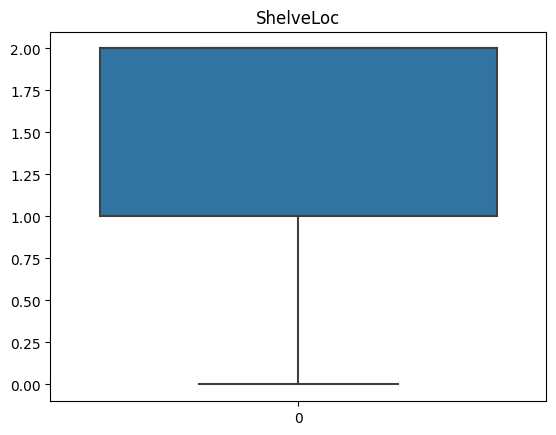

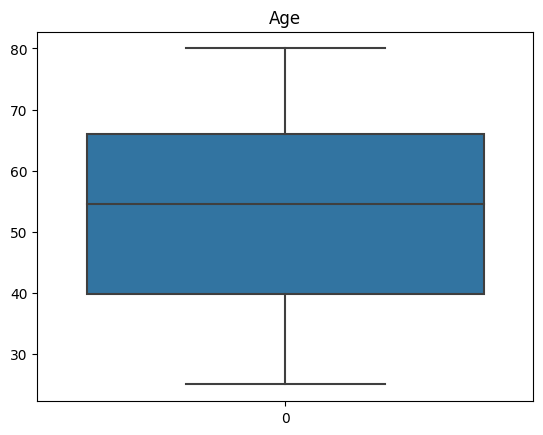

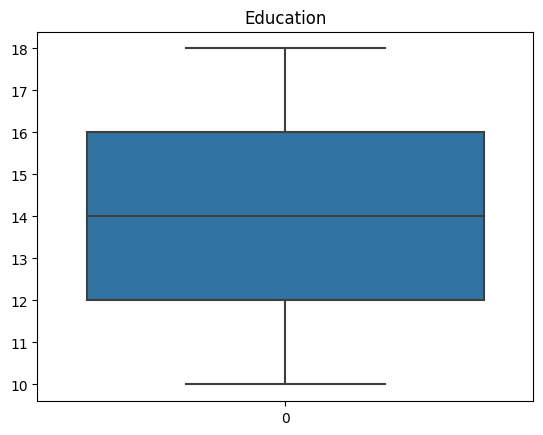

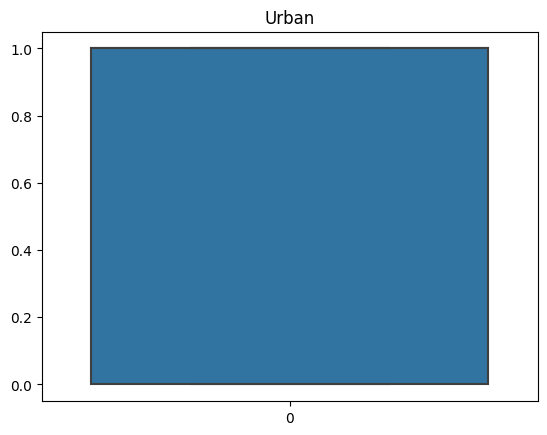

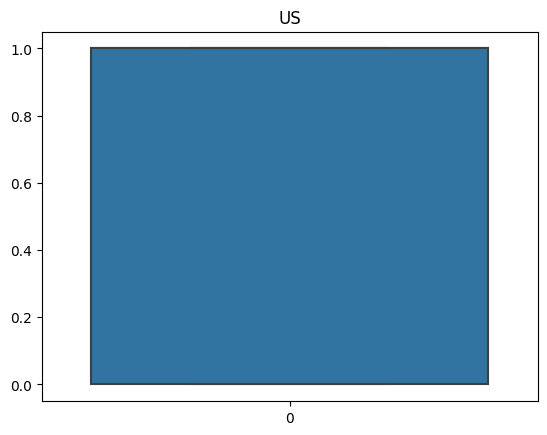

In [ ]:
#@title Visualization
for i in data.columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'ShelveLoc'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Urban'}>,
        <Axes: title={'center': 'US'}>, <Axes: >]], dtype=object)

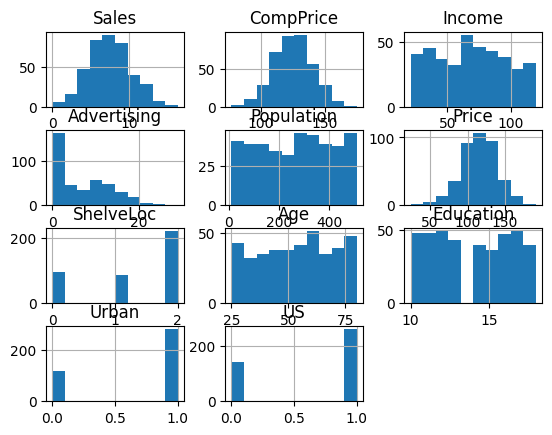

In [ ]:
data.hist()

In [ ]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<Axes: >

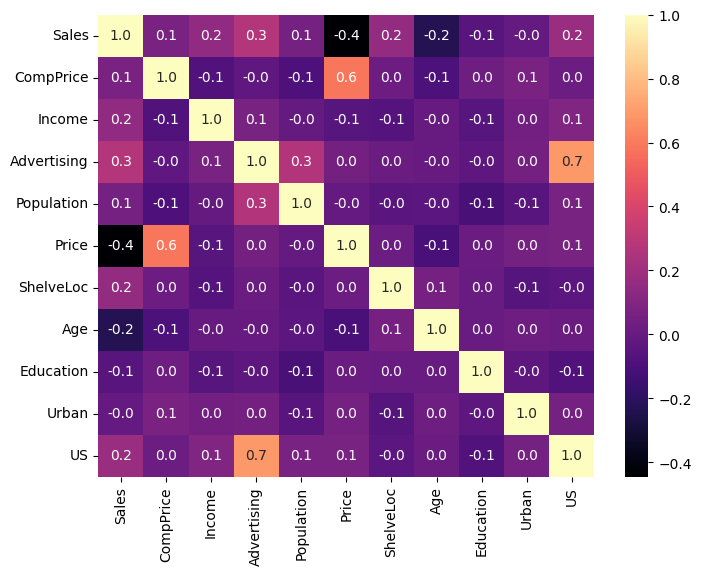

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='magma',annot=True,fmt='.1f')

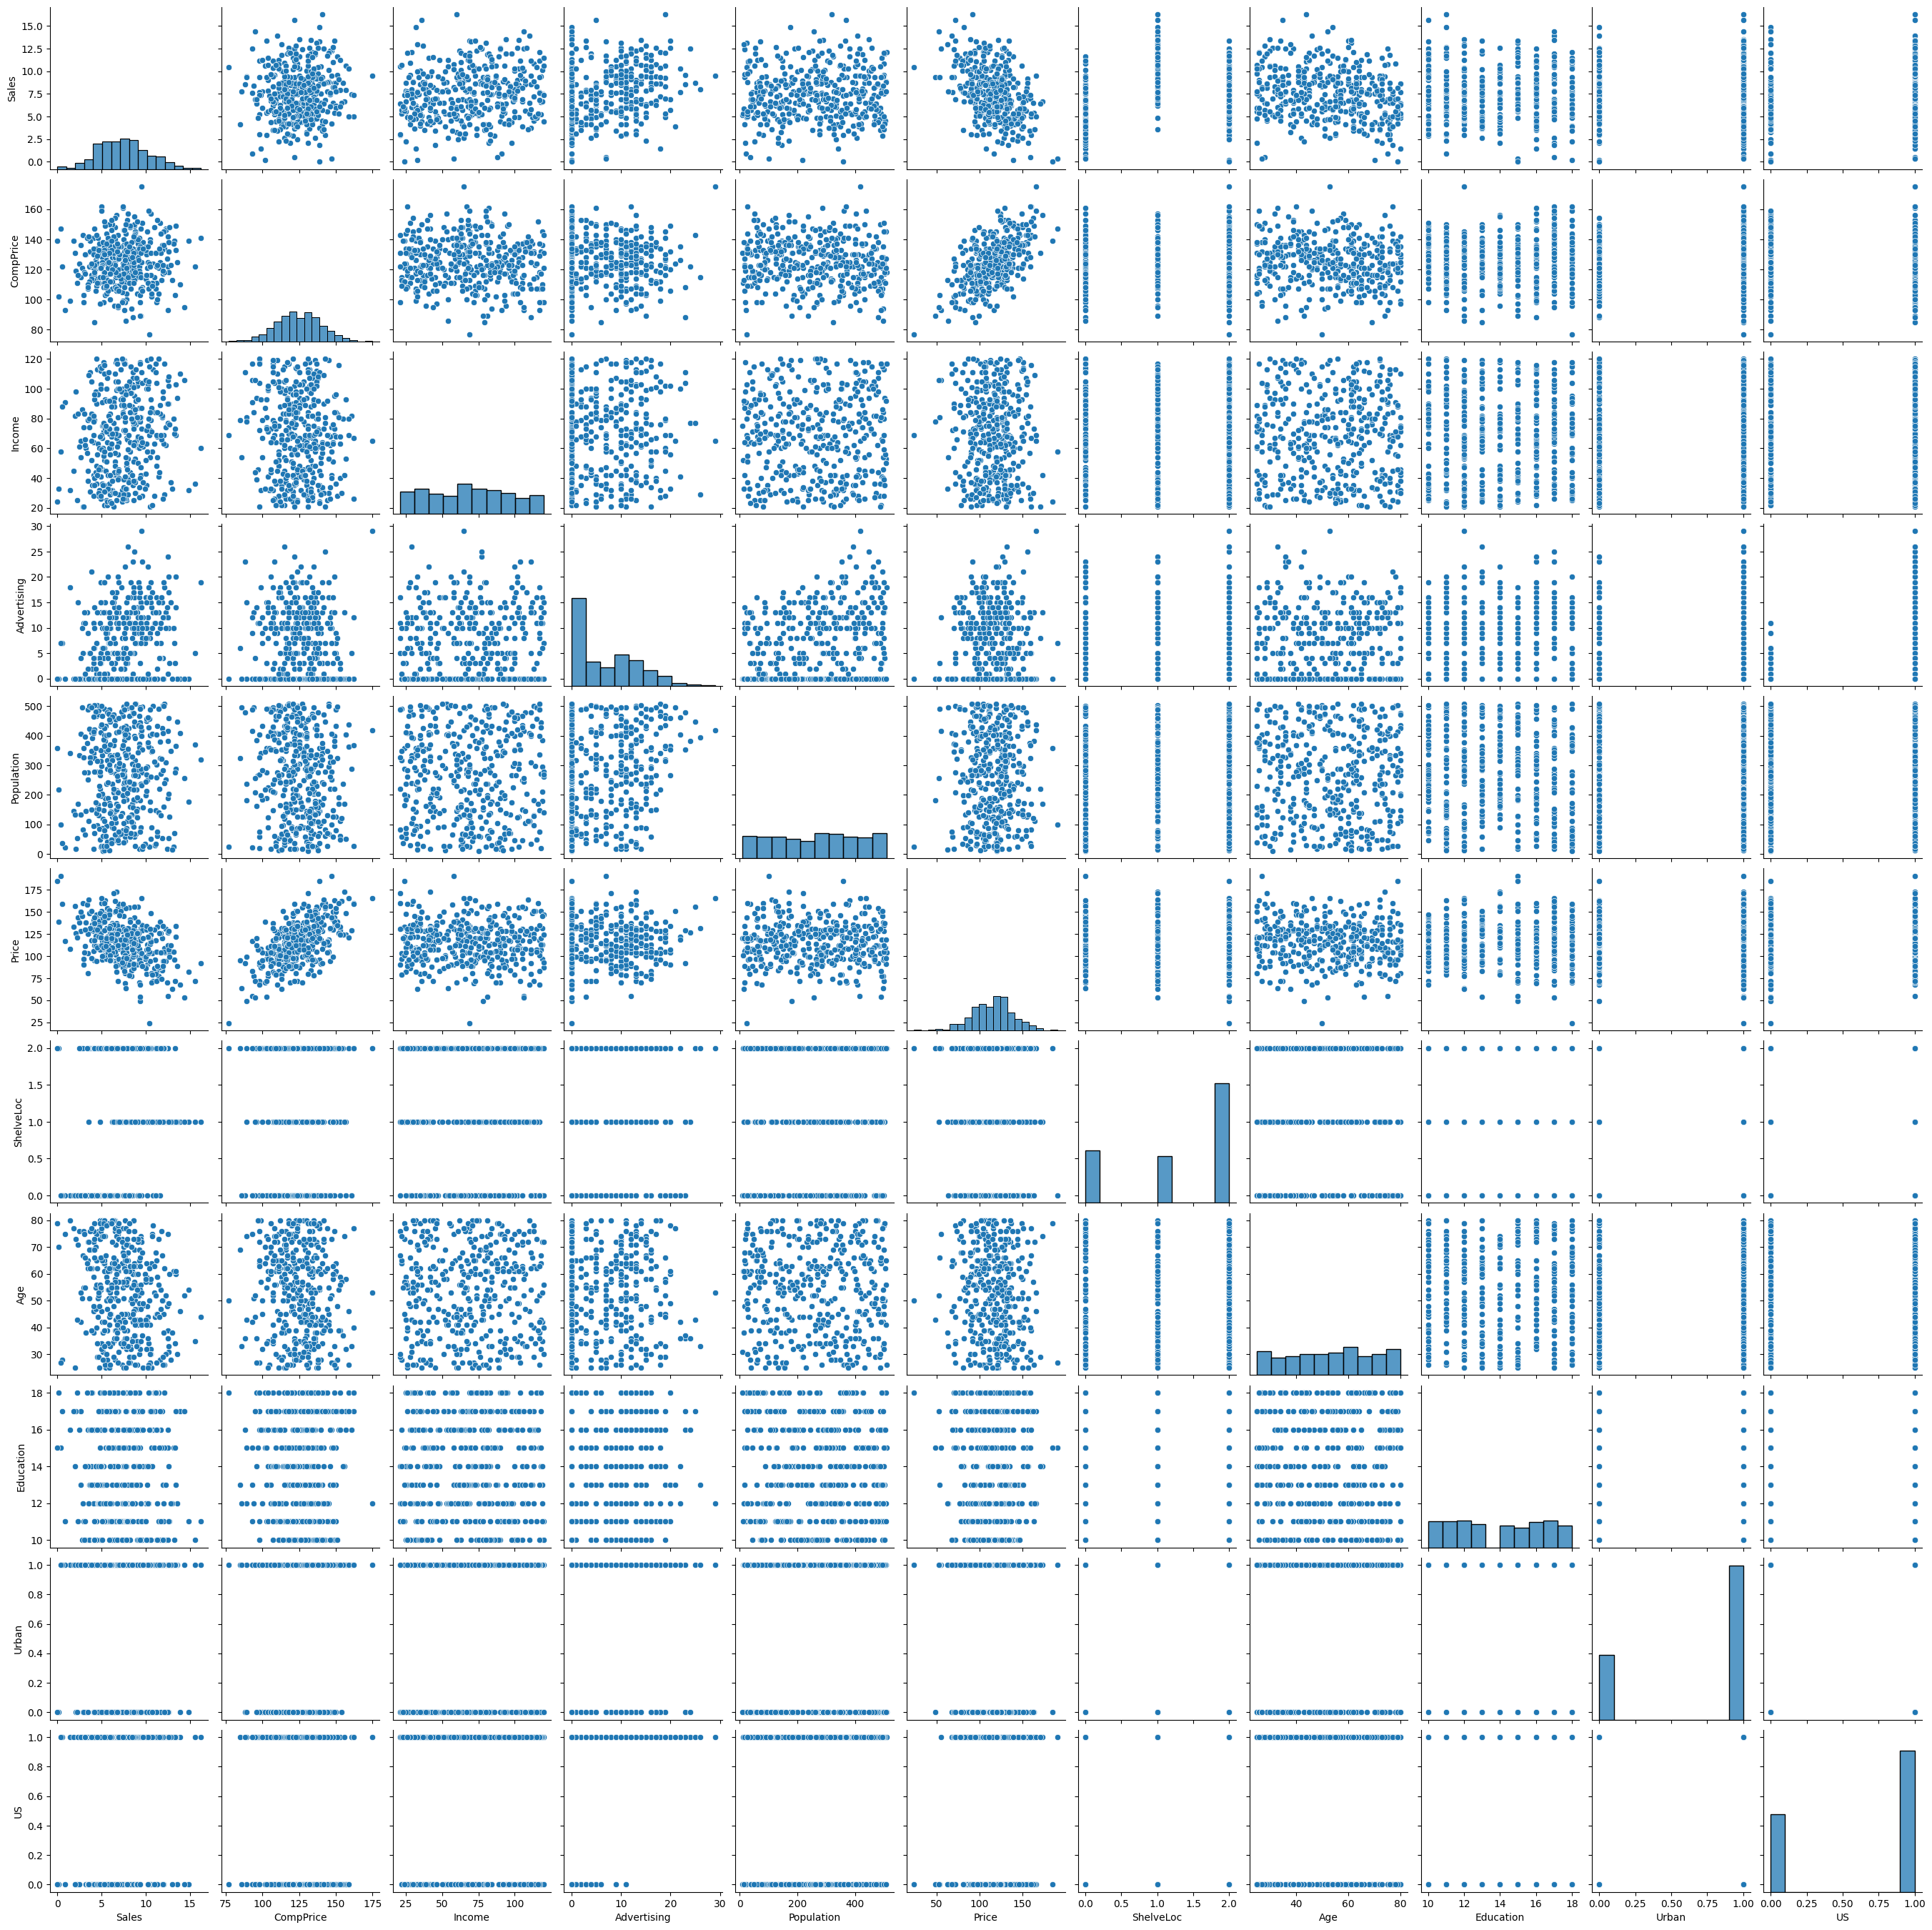

In [ ]:
sns.pairplot(data)

<ipython-input-42-1891c1f0f32e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-42-1891c1f0f32e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-42-1891c1f0f32e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

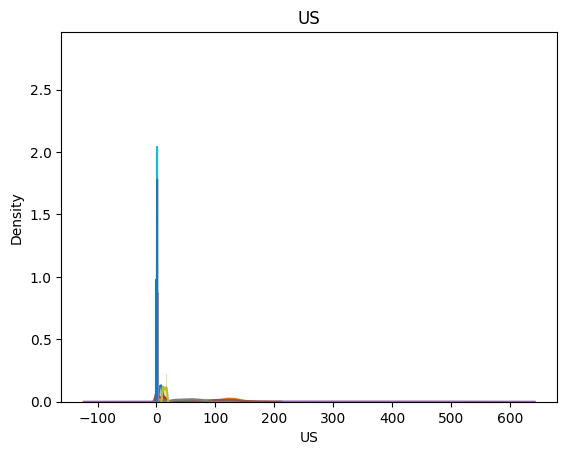

In [42]:
for i in data.columns:
  plt.title(i)
  sns.distplot(data[i])



In [ ]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
#@title Build a model
y=data['ShelveLoc']
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [ ]:
x=data.drop('ShelveLoc',axis=1)
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


In [ ]:
colname=list(data.columns)
colname

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
92,4.53,114,113,0,97,125,29,12,1,0
223,3.45,110,45,9,276,125,62,14,1,1
234,9.43,115,62,11,289,129,56,16,0,1
232,13.14,137,80,10,24,105,61,15,1,1
377,6.81,132,61,0,263,125,41,12,0,0
...,...,...,...,...,...,...,...,...,...,...
323,10.36,107,105,18,428,103,34,12,1,1
192,7.56,108,26,0,408,93,56,14,0,0
117,8.80,145,53,0,507,119,41,12,1,0
47,4.38,126,98,0,173,108,55,16,1,0


In [ ]:
y_train

92     2
223    2
234    1
232    1
377    2
      ..
323    2
192    2
117    2
47     0
172    1
Name: ShelveLoc, Length: 280, dtype: int64

In [ ]:
y_test

132    1
309    0
341    2
196    0
246    0
      ..
216    2
259    0
49     1
238    1
343    0
Name: ShelveLoc, Length: 120, dtype: int64

In [ ]:
y_test.shape

(120,)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.45689655172413796, 0.9, 'x[0] <= 6.165\nentropy = 1.432\nsamples = 280\nvalue = [71, 54, 155]'),
 Text(0.1896551724137931, 0.7, 'x[2] <= 57.5\nentropy = 1.117\nsamples = 102\nvalue = [53, 2, 47]'),
 Text(0.06896551724137931, 0.5, 'x[5] <= 99.5\nentropy = 0.91\nsamples = 40\nvalue = [13, 0, 27]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.10344827586206896, 0.3, 'x[0] <= 5.335\nentropy = 0.776\nsamples = 35\nvalue = [8, 0, 27]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.918\nsamples = 24\nvalue = [8, 0, 16]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 11]'),
 Text(0.3103448275862069, 0.5, 'x[6] <= 78.5\nentropy = 1.094\nsamples = 62\nvalue = [40, 2, 20]'),
 Text(0.2413793103448276, 0.3, 'x[0] <= 3.6\nentropy = 0.99\nsamples = 58\nvalue = [40, 1, 17]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.735\nsamples = 14\nvalue = [12, 1, 1]'),
 Text(0.27586206896551724, 0.1, 'entropy = 0.946\nsample

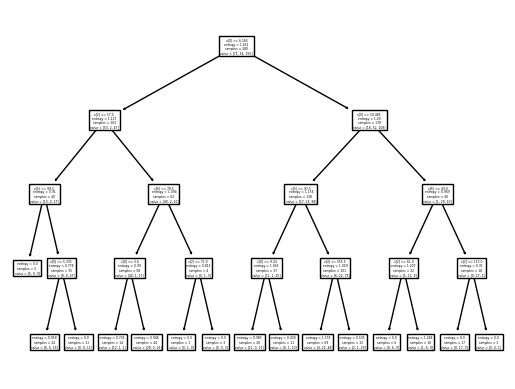

In [ ]:
tree.plot_tree(model)

In [ ]:
y_train.value_counts()

2    155
0     71
1     54
Name: ShelveLoc, dtype: int64

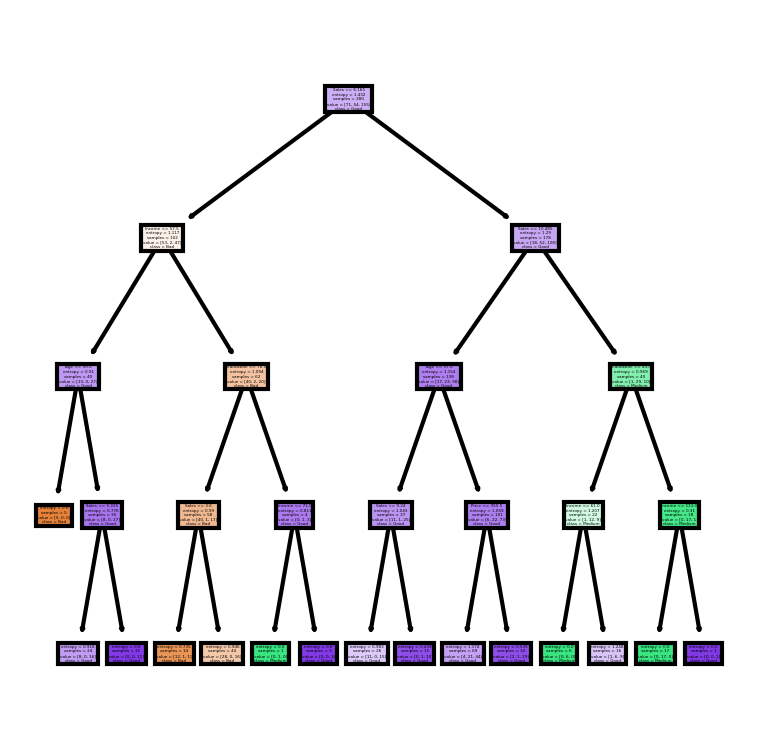

In [ ]:
fn=['Sales','CompPrice','Income','Advertising	Population','Price','Age','Education','Urban','US']
cn=['Bad','Medium','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [ ]:
#prediction
pred=model.predict(x_test)
pd.Series(pred).value_counts()

2    90
1    15
0    15
dtype: int64

In [ ]:
pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1,2
ShelveLoc,,,
0,6,2,17
1,0,9,22
2,9,4,51


In [ ]:
#Acurracy
np.mean(pred==y_test)

0.55